### Importing Packages and Load Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./placement.csv")

In [10]:
data.sample(5)

,cgpa,placement_exam_marks,placed
284,6.99,62.0,1
715,7.41,17.0,1
386,7.63,43.0,0
812,5.99,23.0,0
608,7.33,16.0,1


### Identifying Outliers

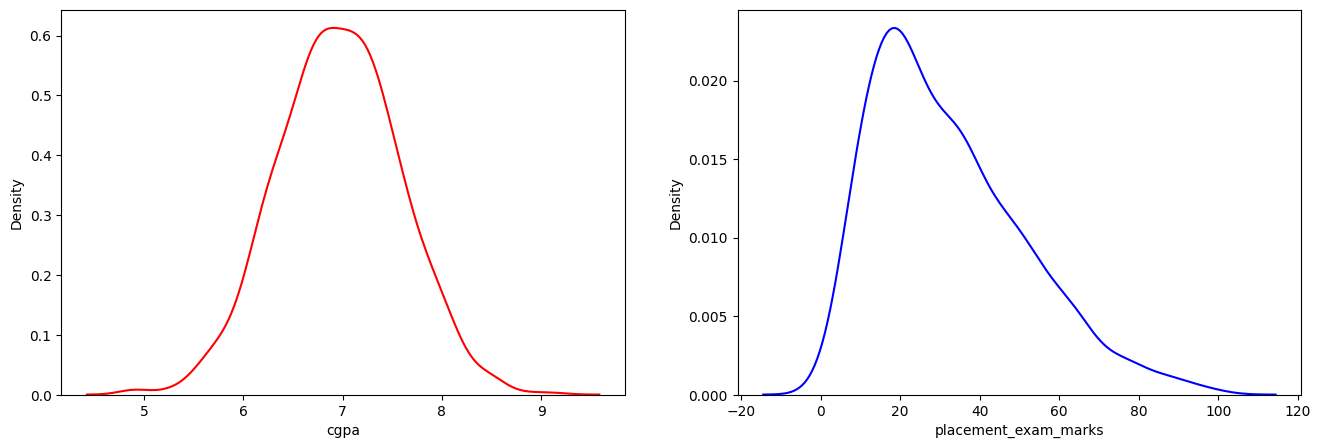

In [15]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data['cgpa'], color='r')
plt.subplot(1, 2, 2)
sns.kdeplot(data['placement_exam_marks'], color='b')
plt.show()

In [16]:
print('Mean of CGPA:', data['cgpa'].mean())
print("STD of CGPA:", data['cgpa'].std())
print("Min of CGPA:", data['cgpa'].min())
print("Max of CGPA:", data['cgpa'].max())

Mean of CGPA: 6.96124
STD of CGPA: 0.6158978751323896
Min of CGPA: 4.89
Max of CGPA: 9.12


In [17]:
print("Highest Allowed", data['cgpa'].mean() + 3*data['cgpa'].std())
print("Lowest Allowed", data['cgpa'].mean() - 3*data['cgpa'].std())

Highest Allowed 8.808933625397168
Lowest Allowed 5.113546374602832


In [19]:
data[(data['cgpa'] > 8.80) | (data['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

In [20]:
new_data = data[(data['cgpa'] < 8.80) & (data['cgpa'] > 5.11)]

In [21]:
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Trimming (Using Z-Score)

In [22]:
data['cgpa_z_score'] = (data['cgpa'] - data['cgpa'].mean())/data['cgpa'].std()

In [23]:
data

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [24]:
data[data['cgpa_z_score'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [26]:
data[data['cgpa_z_score'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [27]:
data[(data['cgpa_z_score'] > 3) | (data['cgpa_z_score'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
new_data = data[(data['cgpa_z_score'] < 3) & (data['cgpa_z_score'] > -3)]

In [29]:
new_data

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

In [30]:
upper_limit = data['cgpa'].mean() + 3*data['cgpa'].std()
lower_limit = data['cgpa'].mean() - 3*data['cgpa'].std()

In [33]:
upper_limit, lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [ ]:
data['cgpa'] = np.where(
    data['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        data['cgpa'] < lower_limit,
        lower_limit,
        data['cgpa']
    )
)

In [35]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64